In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

%matplotlib inline

In [67]:
data_info = pd.read_csv('lending_club_info.csv', index_col = 'LoanStatNew')

In [68]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [69]:
def feat_info(col_name):
    return data_info.loc[col_name]['Description']

In [70]:
print(feat_info('mort_acc'))

Number of mortgage accounts.


In [71]:
df = pd.read_csv('lending_club_loan_two.csv')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

<Axes: xlabel='loan_status', ylabel='count'>

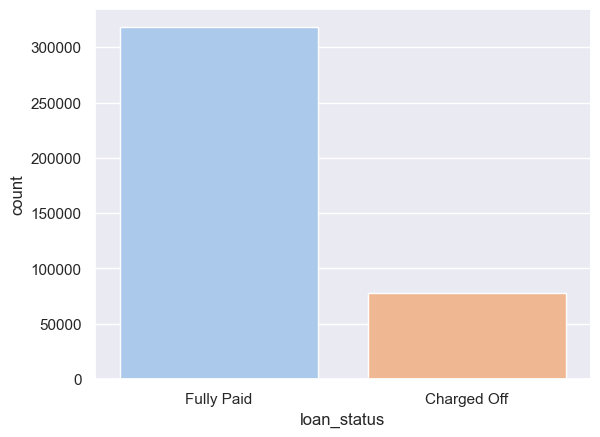

In [73]:
# Exploratory Data Analysis

sns.countplot(x = 'loan_status', data = df, hue = 'loan_status', legend = False, palette = 'pastel')

(0.0, 45000.0)

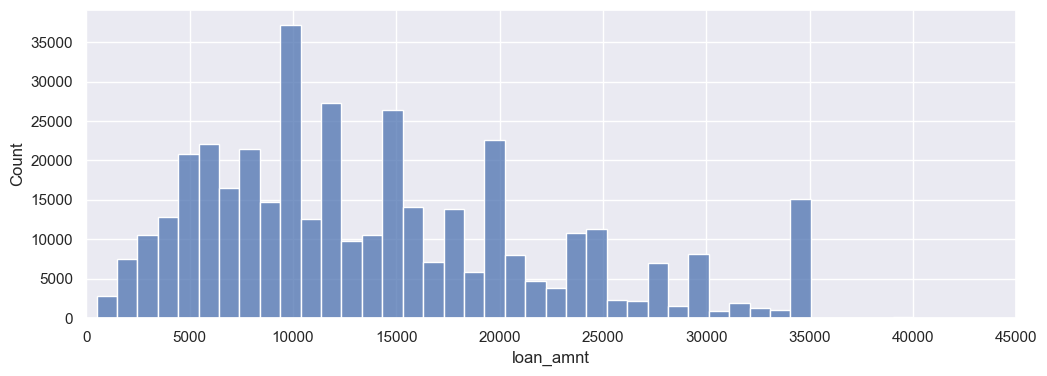

In [74]:
plt.figure(figsize = (12, 4))
sns.histplot(x = 'loan_amnt', data = df, bins = 40)
plt.xlim(0, 45000)

In [75]:
df.corr(numeric_only = True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

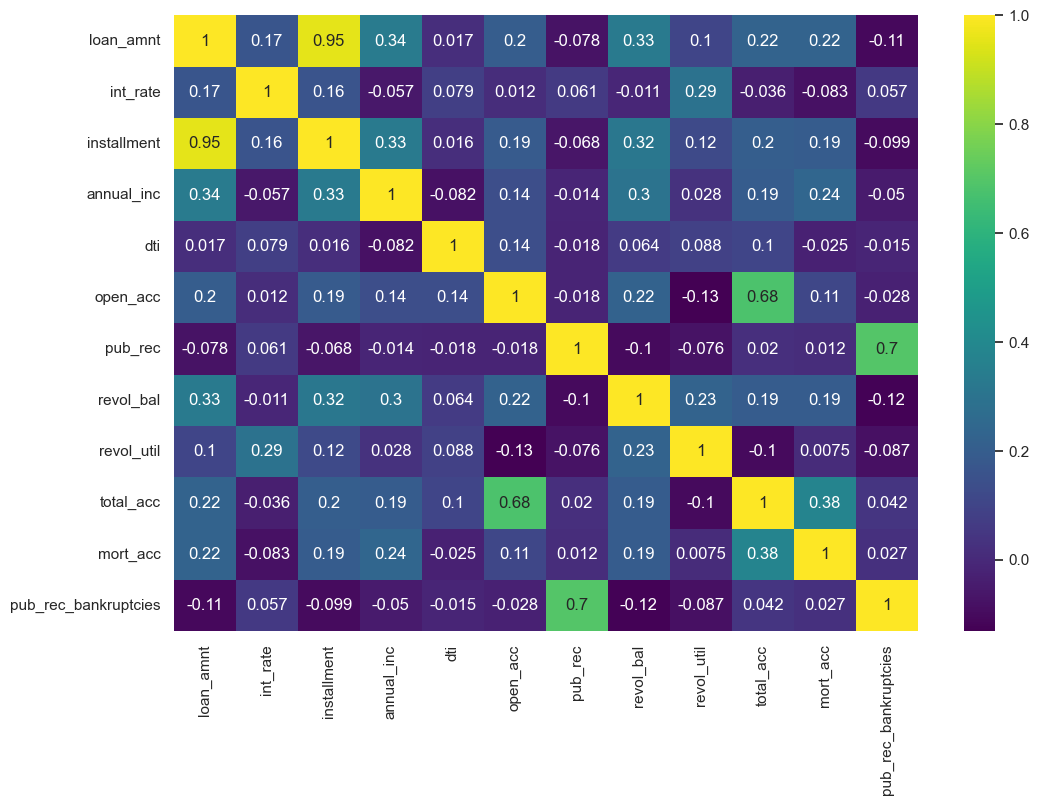

In [76]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'viridis')

In [77]:
print(feat_info('installment'))

The monthly payment owed by the borrower if the loan originates.


In [78]:
print(feat_info('loan_amnt'))

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

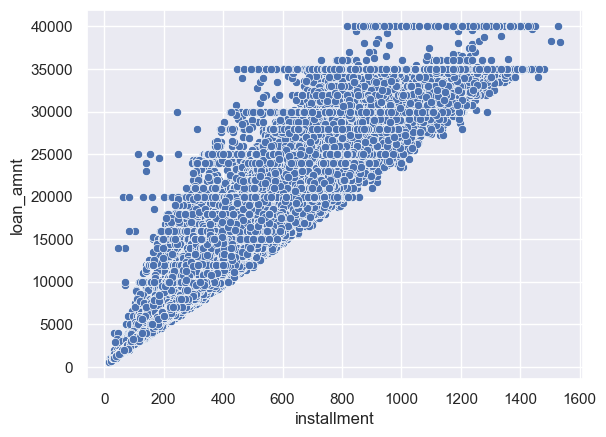

In [79]:
sns.scatterplot(x = 'installment', y = 'loan_amnt', data = df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

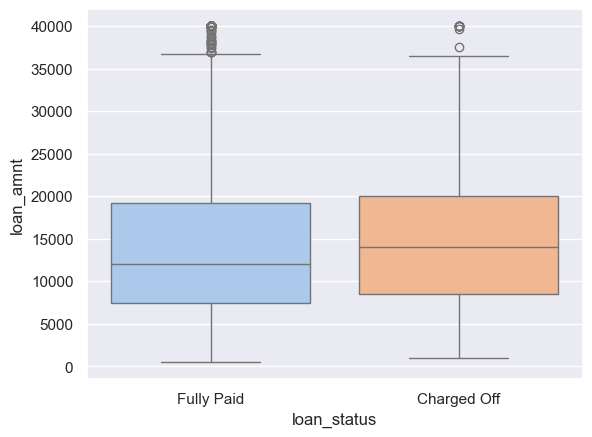

In [80]:
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df, hue = 'loan_status', palette = 'pastel')

In [81]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [82]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [83]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<Axes: xlabel='grade', ylabel='count'>

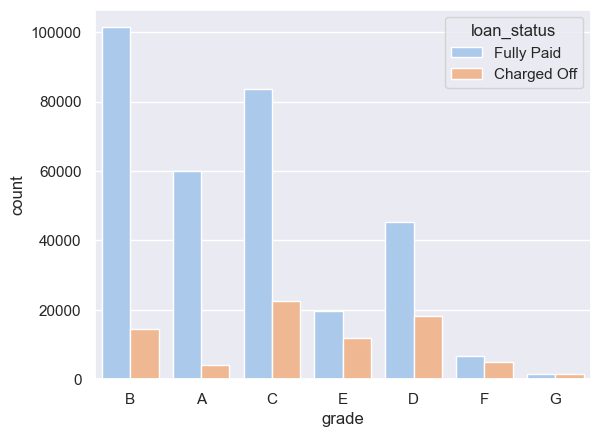

In [84]:
sns.countplot(x = 'grade', data = df, hue = 'loan_status', palette = 'pastel')

<Axes: xlabel='sub_grade', ylabel='count'>

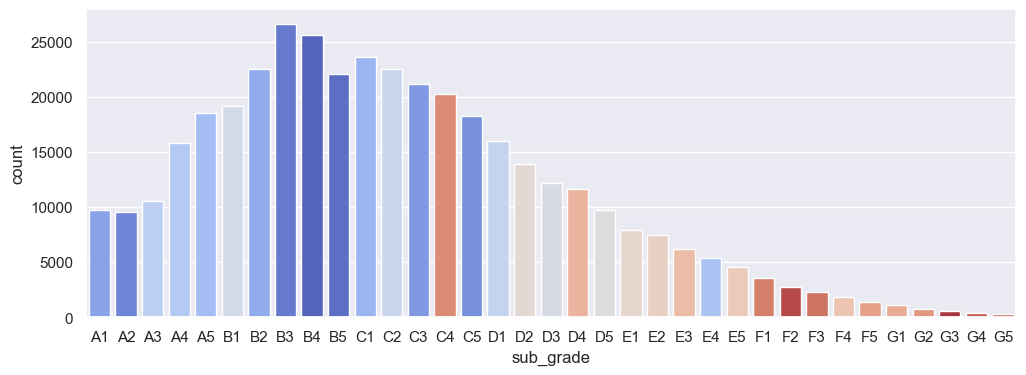

In [85]:
plt.figure(figsize = (12, 4))
subGradeOrder = sorted(df['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = df, order = subGradeOrder, hue = 'sub_grade', legend = False, palette = 'coolwarm')

<Axes: xlabel='sub_grade', ylabel='count'>

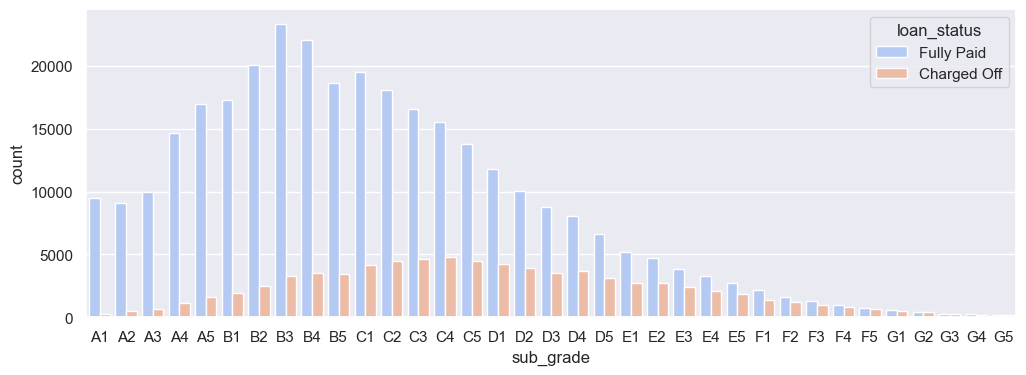

In [86]:
plt.figure(figsize = (12, 4))
sns.countplot(x = 'sub_grade', data = df, order = subGradeOrder, hue = 'loan_status', palette = 'coolwarm')

<Axes: xlabel='sub_grade', ylabel='count'>

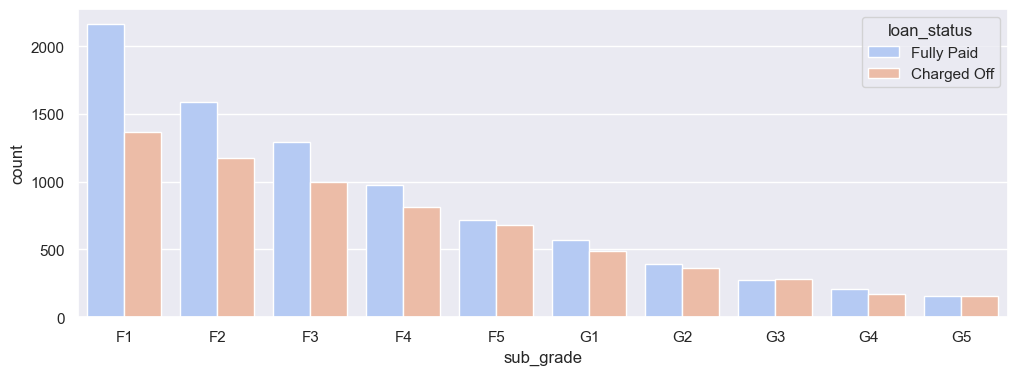

In [87]:
df_f_and_g = df[(df['grade'] == 'F') | (df['grade'] == 'G')]
plt.figure(figsize = (12, 4))
subGradeOrder = sorted(df_f_and_g['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = df_f_and_g, order = subGradeOrder, hue = 'loan_status', palette = 'coolwarm')

In [88]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid' : 1, 'Charged Off' : 0})

<Axes: >

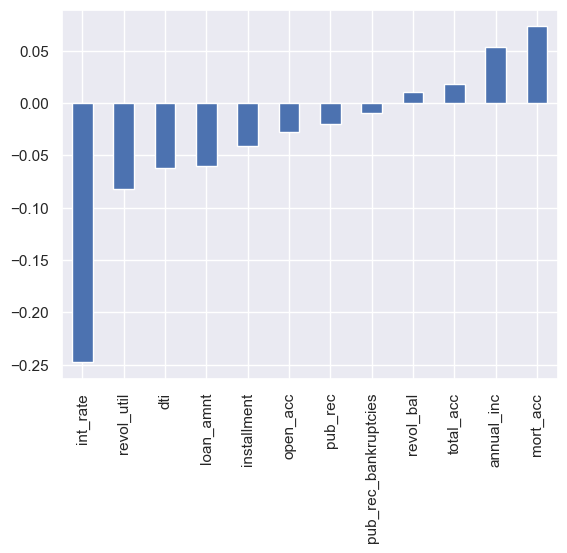

In [89]:
df.corr(numeric_only = True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')

In [90]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [91]:
len(df)

396030

In [92]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [93]:
df.isnull().sum() * 100 / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [94]:
print(feat_info('emp_title'))
print(feat_info('emp_length'))

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [95]:
len(df['emp_title'].unique())

173106

In [96]:
df['emp_title'].value_counts()

emp_title
Teacher                         4389
Manager                         4250
Registered Nurse                1856
RN                              1846
Supervisor                      1830
                                ... 
Social Work/Care Manager           1
Regional Counsel                   1
Nor-Com Inc                        1
Director of the Bach Society       1
SPO II                             1
Name: count, Length: 173105, dtype: int64

In [97]:
df.drop('emp_title', axis = 1, inplace = True)

In [98]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

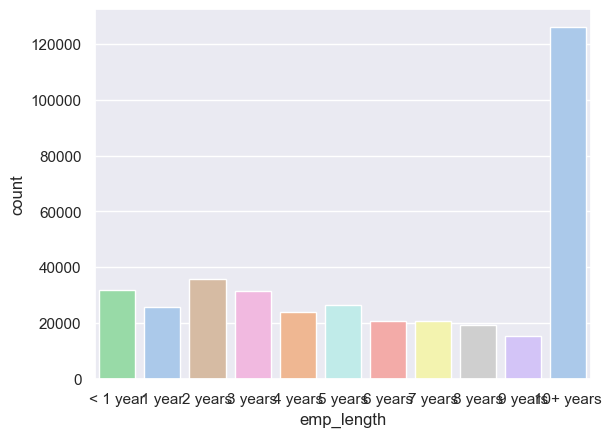

In [99]:
sns.countplot(x = 'emp_length', data = df, order = emp_length_order, hue = 'emp_length', legend = False, palette = 'pastel')

<Axes: xlabel='emp_length', ylabel='count'>

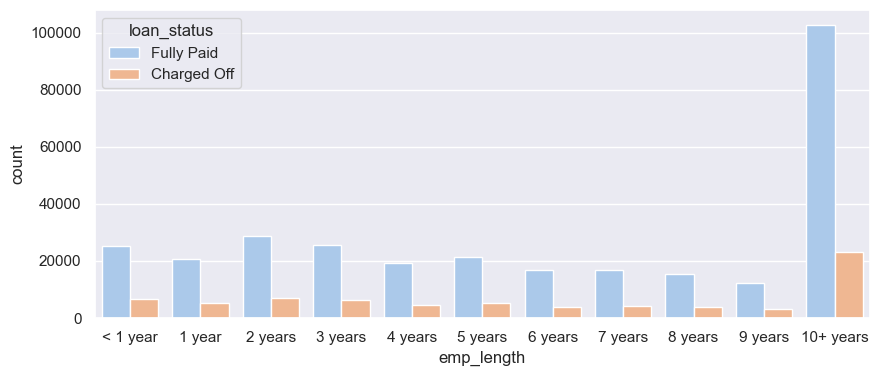

In [100]:
plt.figure(figsize = (10, 4))
sns.countplot(x = 'emp_length', data = df, order = emp_length_order, hue = 'loan_status', palette = 'pastel')

In [101]:
chargedOffCount = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']
chargedOffCount

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [102]:
totalCount = df.groupby('emp_length').count()['loan_status']
totalCount

emp_length
1 year        25882
10+ years    126041
2 years       35827
3 years       31665
4 years       23952
5 years       26495
6 years       20841
7 years       20819
8 years       19168
9 years       15314
< 1 year      31725
Name: loan_status, dtype: int64

<Axes: xlabel='emp_length'>

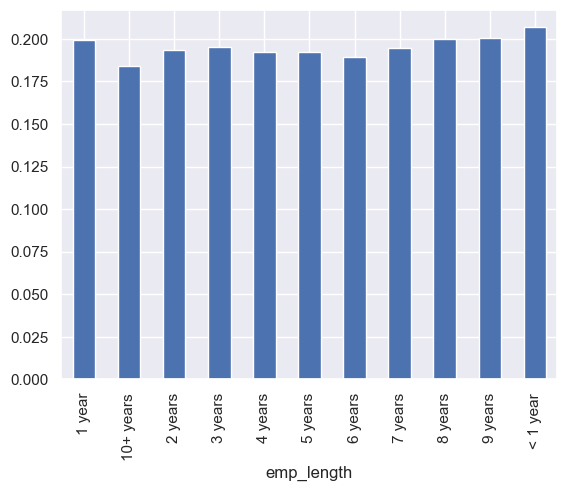

In [103]:
chargefOffPercentage = chargedOffCount / totalCount
chargefOffPercentage.plot(kind = 'bar')

In [104]:
df.drop('emp_length', axis = 1, inplace = True)

In [105]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [106]:
df['title'].head()

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [107]:
df['purpose'].head()

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

In [108]:
df.drop('title', axis = 1, inplace = True)

In [109]:
print(feat_info('mort_acc'))

Number of mortgage accounts.


In [110]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
26.0         2
32.0         2
31.0         2
23.0         2
34.0         1
28.0         1
30.0         1
Name: count, dtype: int64

In [111]:
df.corr(numeric_only = True)['mort_acc'].sort_values(ascending = False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [112]:
totalAvgGrouped = df.groupby('total_acc')['mort_acc'].mean()

In [113]:
def fillMortAcc (total_acc, mort_acc):
    if np.isnan(mort_acc):
        return totalAvgGrouped[total_acc]
    else:
        return mort_acc

In [114]:
df['mort_acc'] = df.apply(lambda x: fillMortAcc(x['total_acc'], x['mort_acc']), axis = 1)

In [115]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [116]:
df.dropna(inplace = True)

In [117]:
df.select_dtypes(include = ['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [118]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [119]:
df.drop('grade', axis = 1, inplace = True)

In [120]:
subgradeDummies = pd.get_dummies(df['sub_grade'], drop_first = True)
df.drop('sub_grade', axis = 1, inplace = True)
df = pd.concat([df, subgradeDummies], axis = 1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [121]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first = True)
df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis = 1, inplace = True)
df = pd.concat([df, dummies], axis = 1)

In [122]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [123]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [124]:
dummies = pd.get_dummies(df['home_ownership'], drop_first = True)
df = df.drop('home_ownership', axis = 1)
df = pd.concat([df, dummies], axis = 1)

In [125]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])
dummies = pd.get_dummies(df['zip_code'], drop_first = True)
df = df.drop(['zip_code','address'], axis = 1)
df = pd.concat([df,dummies], axis = 1)

In [126]:
df = df.drop('issue_d', axis = 1)

In [127]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date : int(date[-4:]))
df = df.drop('earliest_cr_line', axis = 1)

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
df = df.drop('loan_status', axis = 1)

In [130]:
X = df.drop('loan_repaid', axis = 1).values
y = df['loan_repaid'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
scaler = MinMaxScaler()

In [133]:
X_train = scaler.fit_transform(X_train)

In [134]:
X_test = scaler.transform(X_test)

In [135]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

In [137]:
X_train.shape

(316175, 78)

In [138]:
model = Sequential()

model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation = 'tanh'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [139]:
model.fit(x = X_train, y = y_train, epochs = 30, batch_size = 256, validation_data = (X_test, y_test))

Epoch 1/30
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4851 - val_loss: 0.2676
Epoch 2/30
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2818 - val_loss: 0.2655
Epoch 3/30
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2735 - val_loss: 0.2635
Epoch 4/30
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2694 - val_loss: 0.2629
Epoch 5/30
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2670 - val_loss: 0.2634
Epoch 6/30
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2646 - val_loss: 0.2623
Epoch 7/30
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2631 - val_loss: 0.2623
Epoch 8/30
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2618 - val_loss: 0.2623
Epoch 9/30
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2607 - val_loss: 0.2625
Epoch 10/30
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2603 - val_loss: 0.2621
Epoch 11/30
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2599 - val_loss: 0.2619
Epoch 12/30
1236/1236 ━━━━━━━━

In [141]:
from tensorflow.keras.models import load_model

In [143]:
model.save("myModel.keras")

In [144]:
losses = pd.DataFrame(model.history.history)

<Axes: >

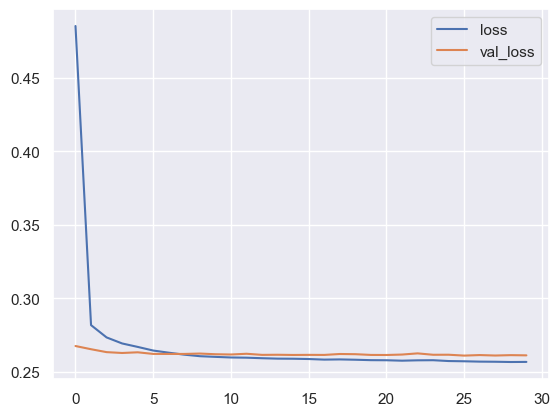

In [145]:
losses[['loss', 'val_loss']].plot()

In [146]:
from sklearn.metrics import classification_report,confusion_matrix

In [148]:
y_prob = model.predict(X_test)
predictions = (y_prob > 0.5).astype(int)

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step


In [149]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [150]:
confusion_matrix(y_test,predictions)

array([[ 6790,  8868],
       [   55, 63331]])

In [155]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis = 1).iloc[random_ind]
new_customer

loan_amnt           25000.0
term                     60
int_rate              18.24
installment          638.11
annual_inc          61665.0
                     ...   
48052                 False
70466                 False
86630                 False
93700                 False
earliest_cr_year       1996
Name: 305323, Length: 78, dtype: object

In [156]:
new_customer = new_customer.values.astype(np.float32).reshape(1, 78)
prob = model.predict(new_customer)
print(prob > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[ True]]


In [157]:
df.iloc[random_ind]['loan_repaid']

np.int64(1)